In [206]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_network_graph(nodes, send_edges, receive_edges, node_pos = None, scale_factor = 1):
    # Create an empty directed graph
    graph = nx.DiGraph()

    # Add nodes to the graph
    graph.add_nodes_from(nodes)

    # if 2 edges have the same source and target, merge them to one edge
    send_edges = [(edge[0], edge[1], f'{edge[2]}!!') for edge in send_edges]
    receive_edges = [(edge[0], edge[1], f'{edge[2]}??') for edge in receive_edges]
    all_edges = send_edges + receive_edges

    # merge all edges labels
    merged_edges = []
    for edge in all_edges:
        found = False
        for e in merged_edges:
            if e[0] == edge[0] and e[1] == edge[1]:
                e[2] = e[2] + ', ' + edge[2]
                found = True
        if found == False:
            e = {
                0: edge[0],
                1: edge[1],
                2: edge[2],
            }
            merged_edges.append(e)

    # Set the layout of the graph, where every 2 nodes are in a row, from top to bottom
    scale = 6
    pos = {}
    if node_pos:
        for n in node_pos:
            pos[n] = (node_pos[n][0] / scale, node_pos[n][1] / scale)
    else:
        for i in range(len(nodes)):
            pos[nodes[i]] = ((-i % 2) / scale, -(i // 2) / scale)

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)

    # Add edges to the graph
    for edge in merged_edges:
            graph.add_edge(edge[0], edge[1], label=edge[2], labeldistance=0.5)

    edges = graph.edges()
    nx.draw_networkx_edges(graph, pos, edgelist=edges, connectionstyle='arc3,rad=0.05', arrowsize=20)

    # Draw edge labels, above the edges and not overlapping with them
    # create a dictionary of tuble pos to label
    for edge in edges:
        e = graph.get_edge_data(edge[0], edge[1])
        x = (pos[edge[0]][0] + pos[edge[1]][0]) / 2
        y = (pos[edge[0]][1] + pos[edge[1]][1]) / 2
        # if left to right edge, subtract 0.05 to y
        if pos[edge[0]][0] < pos[edge[1]][0]:
            y -= 0.02 * scale_factor
        # if right to left edge, add 0.05 from y
        elif pos[edge[0]][0] > pos[edge[1]][0]:
            y += 0.02 * scale_factor
        # adjust x axis
        if pos[edge[0]][1] < pos[edge[1]][1]:
            x += 0.01
        elif pos[edge[0]][1] > pos[edge[1]][1]:
            x -= 0.01
        # if self loop
        if pos[edge[0]][0] == pos[edge[1]][0] and pos[edge[0]][1] == pos[edge[1]][1]:
            y += 0.03
        plt.text(x, y, e.get('label'), horizontalalignment='center', fontsize=12)

    # Draw node labels
    node_labels = {node: node for node in nodes}
    nx.draw_networkx_labels(graph, pos, labels=node_labels)

    # Display the graph
    plt.axis('off')
    # save the graph
    plt.savefig('protocol5.png')
    plt.show()



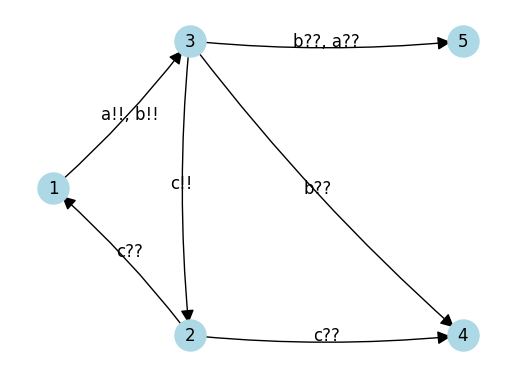

In [207]:
# # params
# nodes = ['1', '2', '3']
# send_edges = [('1', '2', 'a'),('2', '3', 'b')]
# receive_edges = [('3', '2', 'a'),('2', '3', 'a')]

# # draw protocol
# node_pos = {
#     '1': (0, 0), 
#     '2': (1, 0), 
#     '3': (2, 0),
#     '4': (3, 0),
#     '5': (4, 0),
# }

nodes = ['1', '2', '3', '4', '5']
send_edges = [('1', '3', 'a'), ('1', '3', 'b'), ('3', '2', 'c')]
receive_edges = [('2', '4', 'c'), ('3', '5', 'b'), ('3', '5', 'a'), ('3', '4', 'b'), ('2', '1', 'c')]

draw_network_graph(nodes, send_edges, receive_edges, node_pos = node_pos, scale_factor = 0.15)


In [208]:
# # params
# nodes = ['1', '2', '3', '4']
# send_edges = [('1', '2', 'a'),('2', '3', 'b'),('3', '4', 'c')]
# receive_edges = [('3', '2', 'a'),('4', '3', 'b')]

# # draw protocol
# node_pos = {
#     '1': (0, 0), 
#     '2': (1, 0), 
#     '3': (2, 0),
#     '4': (3, 0),
# }
# draw_network_graph(nodes, send_edges, receive_edges, node_pos = node_pos, scale_factor = 0.15)


In [209]:
# # params
# nodes = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
# send_edges = [
#     ('1', '2', 'a'),
#     ('2', '3', 'b'),
#     ('4', '5', 'c'),
#     ('5', '8', 'd'),
#     ('5', '8', 'e')]
# receive_edges = [('2', '4', 'b'),
#                  ('4', '6', 'd'),
#                  ('4', '7', 'e'),
#                  ('6', '8', 'd'),
#                  ('7', '8', 'e'),
#                  ('8', '9', 'a'),
#                  ]

# # draw protocol
# node_pos = {
#     '1': (0, 0), 
#     '2': (1, 0), 
#     '3': (2, 0.5), 
#     '4': (2, -0.5), 
#     '5': (3, 0), 
#     '6': (3, -0.5), 
#     '7': (3, -1), 
#     '8': (4, -0.5), 
#     '9': (5, -0.5), 
# }
# draw_network_graph(nodes, send_edges, receive_edges, node_pos = node_pos, scale_factor = 1)


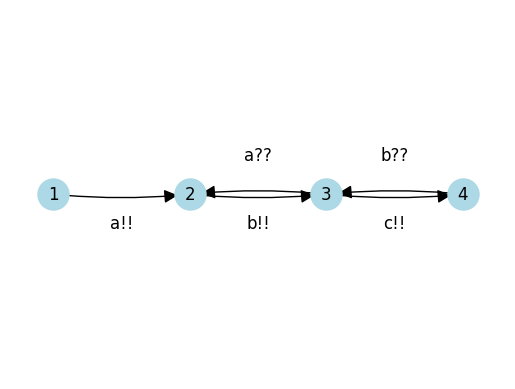

In [210]:
# params
nodes = ['1', '2', '3', '4']
send_edges = [('1', '2', 'a'),('2', '3', 'b'),('3', '4', 'c')]
receive_edges = [('3', '2', 'a'),('4', '3', 'b')]


# draw protocol
node_pos = {
    '1': (0, 0), 
    '2': (1, 0), 
    '3': (2, 0), 
    '4': (3, 0)
}
draw_network_graph(nodes, send_edges, receive_edges, node_pos = node_pos, scale_factor = 0.15)


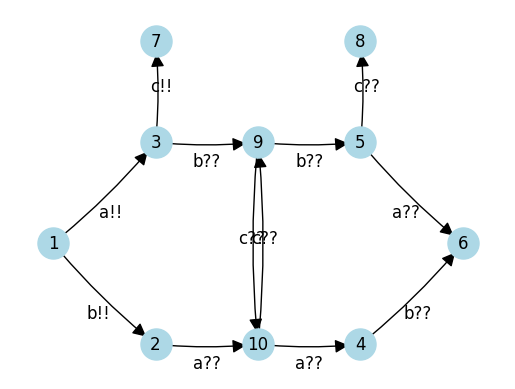

In [211]:
# params
nodes = ['1', '2', '3', '9', '10', '4', '5', '6', '7', '8']
send_edges = [
    ('1', '3', 'a'),
    ('1', '2', 'b'),
    ('3', '7', 'c')]
receive_edges = [('3', '9', 'b'),
                 ('9', '5', 'b'),
                 ('2', '10', 'a'),
                 ('10', '4', 'a'),
                 ('4', '6', 'b'),
                 ('5', '6', 'a'),
                 ('5', '8', 'c'),
                 ('9', '10', 'c'),
                 ('10', '9', 'c')
                ]

# draw protocol
node_pos = {
    '1': (0, 0), 
    '2': (1, -0.5), 
    '3': (1, 0.5), 
    '4': (3, -0.5), 
    '5': (3, 0.5), 
    '6': (4, 0), 
    '7': (1, 1), 
    '8': (3, 1), 
    '9': (2, 0.5), 
    '10': (2, -0.5) 
}
draw_network_graph(nodes, send_edges, receive_edges, node_pos = node_pos, scale_factor = 1)


In [212]:
# # params
# nodes = ['1', '2', '3', '4', '5']
# send_edges = [('1', '2', 'a'),('2', '4', 'b'),('4', '5', 'c'),('3', '5', 'd')]
# receive_edges = [('2', '3', 'c')]

# # draw protocol
# node_pos = {
#     '1': (0, 0), 
#     '2': (1, 0), 
#     '3': (2, 0.5), 
#     '4': (2, -0.5), 
#     '5': (3, 0), 
# }
# draw_network_graph(nodes, send_edges, receive_edges, node_pos = node_pos, scale_factor = 1)


In [213]:
# get all letters from send_edges
letters = [edge[2] for edge in send_edges]

# fill gaps in receive_edges, where for each letter, every node must have a receive edge
# if doesn't have, add a receive edge as a self loop
for letter in letters:
    for node in nodes:
        found = False
        for edge in receive_edges:
            if edge[0] == node and edge[2] == letter:
                found = True
        if found == False:
            receive_edges.append((node, node, letter))

# Model

In [214]:
# # Example usage
# nodes = ['A', 'B', 'C', 'D']
# node_pos = {
#     'A': (1, 0),
#     'B': (0, 1),
#     'C': (1, 1),
#     'D': (0, 0)
# }

# send_edges = [('A', 'B', 'a'),('A', 'D', 'c'), ('A', 'B', 'd'), ('A', 'C', 'b')]
# receive_edges = [('A', 'A', 'a'), ('A', 'A', 'b'), ('B', 'A', 'a'), ('C', 'D', 'a'), ('B', 'D', 'a')]

# draw_network_graph(nodes, send_edges, receive_edges, None)


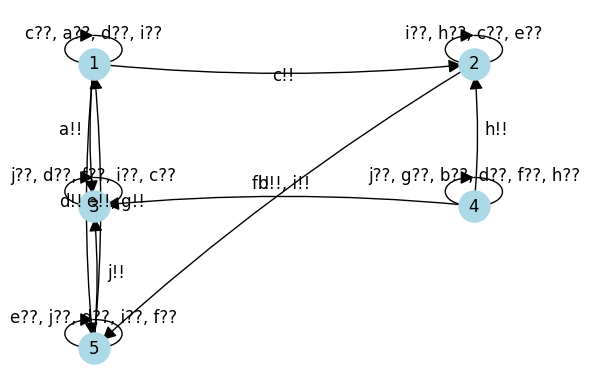

In [215]:
# random graph generator
import random

def generate_random_graph(num_of_nodes, num_of_edges):
    nodes = [str(i) for i in range(1, num_of_nodes + 1)]
    send_edges = []
    receive_edges = []
    for i in range(num_of_edges):
        source = random.choice(nodes)
        target = random.choice(nodes)
        while source == target:
            target = random.choice(nodes)
        letter = chr(97 + i)
        send_edges.append((source, target, letter))
        # random number of receivers
        num_of_receivers = random.randint(1, num_of_nodes)
        for j in range(num_of_receivers):
            source_r = random.choice(nodes)
            target_r = source
            if source_r != source:
                target_r = random.choice(nodes)
            receive_edges.append((target_r, target_r, letter))
    # remove duplicates
    send_edges = list(set(send_edges))
    receive_edges = list(set(receive_edges))
    return nodes, send_edges, receive_edges

# show random graph
nodes, send_edges, receive_edges = generate_random_graph(5, 10)
draw_network_graph(nodes, send_edges, receive_edges, None)